In [1]:
%matplotlib inline


# Sun path diagram

Examples of generating sunpath diagrams.


This example shows basic usage of pvlib's solar position calculations with
:py:meth:`pvlib.solarposition.get_solarposition`.  The examples shown here
will generate sunpath diagrams that shows solar position over a year.

## Polar plot

Below is an example plot of solar position in
`polar coordinates <https://en.wikipedia.org/wiki/Polar_coordinate_system>`_.



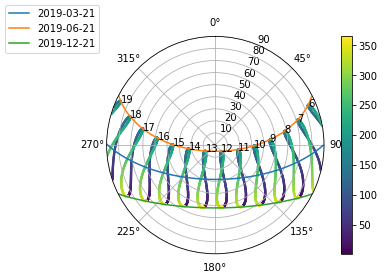

In [2]:
from pvlib import solarposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tz = 'Asia/Calcutta'
lat, lon = 28.6, 77.2

times = pd.date_range('2019-01-01 00:00:00', '2020-01-01', closed='left',
                      freq='H', tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)
# remove nighttime
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

ax = plt.subplot(1, 1, 1, projection='polar')
# draw the analemma loops
points = ax.scatter(np.radians(solpos.azimuth), solpos.apparent_zenith,
                    s=2, label=None, c=solpos.index.dayofyear)
ax.figure.colorbar(points)

# draw hour labels
for hour in np.unique(solpos.index.hour):
    # choose label position by the smallest radius for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    r = subset.apparent_zenith
    pos = solpos.loc[r.idxmin(), :]
    ax.text(np.radians(pos['azimuth']), pos['apparent_zenith'], str(hour))

# draw individual days
for date in pd.to_datetime(['2019-03-21', '2019-06-21', '2019-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=tz)
    solpos = solarposition.get_solarposition(times, lat, lon)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%Y-%m-%d')
    ax.plot(np.radians(solpos.azimuth), solpos.apparent_zenith, label=label)

ax.figure.legend(loc='upper left')

# change coordinates to be like a compass
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(90)

plt.show()

This is a polar plot of hourly solar zenith and azimuth. The figure-8
patterns are called `analemmas <https://en.wikipedia.org/wiki/Analemma>`_ and
show how the sun's path slowly shifts over the course of the year .  The
colored lines show the single-day sun paths for the winter and summer
solstices as well as the spring equinox.

The soltice paths mark the boundary of the sky area that the sun traverses
over a year.  The diagram shows that there is no point in the
year when is the sun directly overhead (zenith=0) -- note that this location
is north of the Tropic of Cancer.

Examining the sun path for the summer solstice in particular shows that
the sun rises north of east, crosses into the southern sky around 10 AM for a
few hours before crossing back into the northern sky around 3 PM and setting
north of west.  In contrast, the winter solstice sun path remains in the
southern sky the entire day.  Moreover, the diagram shows that the winter
solstice is a shorter day than the summer soltice -- in December, the sun
rises after 7 AM and sets before 6 PM, whereas in June the sun is up before
6 AM and sets after 7 PM.

Another use of this diagram is to determine what times of year the sun is
blocked by obstacles. For instance, for a mountain range on the western side
of an array that extends 10 degrees above the horizon, the sun is blocked:

- after about 6:30 PM on the summer solstice
- after about 5:30 PM on the spring equinox
- after about 4:30 PM on the winter solstice



## PVSyst Plot

PVSyst users will be more familiar with sunpath diagrams in Cartesian
coordinates:



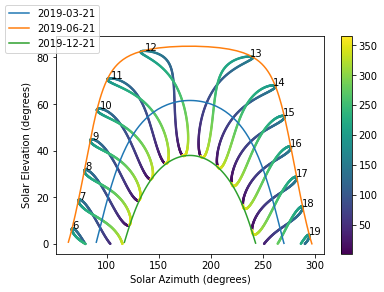

In [3]:
from pvlib import solarposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tz = 'Asia/Calcutta'
lat, lon = 28.6, 77.2
times = pd.date_range('2019-01-01 00:00:00', '2020-01-01', closed='left',
                      freq='H', tz=tz)

solpos = solarposition.get_solarposition(times, lat, lon)
# remove nighttime
solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]

fig, ax = plt.subplots()
points = ax.scatter(solpos.azimuth, solpos.apparent_elevation, s=2,
                    c=solpos.index.dayofyear, label=None)
fig.colorbar(points)

for hour in np.unique(solpos.index.hour):
    # choose label position by the largest elevation for each hour
    subset = solpos.loc[solpos.index.hour == hour, :]
    height = subset.apparent_elevation
    pos = solpos.loc[height.idxmax(), :]
    ax.text(pos['azimuth'], pos['apparent_elevation'], str(hour))

for date in pd.to_datetime(['2019-03-21', '2019-06-21', '2019-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=tz)
    solpos = solarposition.get_solarposition(times, lat, lon)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%Y-%m-%d')
    ax.plot(solpos.azimuth, solpos.apparent_elevation, label=label)

ax.figure.legend(loc='upper left')
ax.set_xlabel('Solar Azimuth (degrees)')
ax.set_ylabel('Solar Elevation (degrees)')

plt.show()